In [1]:
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [2]:
from detectron2.data.datasets import register_coco_instances

In [3]:
register_coco_instances('lslm_coco_test', {}, 
                        '/home/workspace/bolt_nut/datasets/annotations/lslm_test.json', 
                       '/home/workspace/bolt_nut/datasets/lslm-test')

In [4]:
register_coco_instances('lslm_coco_train', {}, 
                        '/home/workspace/bolt_nut/datasets/annotations/lslm_train.json', 
                       '/home/workspace/bolt_nut/datasets/lslm')

In [5]:
from detectron2.data import MetadataCatalog, DatasetCatalog

In [6]:
coco_lslm_test_metadata = MetadataCatalog.get("lslm_coco_test")
test_dataset_dicts = DatasetCatalog.get("lslm_coco_test")
coco_lslm_test_metadata

[03/30 13:12:49 d2.data.datasets.coco]: Loaded 10 images in COCO format from /home/workspace/bolt_nut/datasets/annotations/lslm_test.json


Metadata(evaluator_type='coco', image_root='/home/workspace/bolt_nut/datasets/lslm-test', json_file='/home/workspace/bolt_nut/datasets/annotations/lslm_test.json', name='lslm_coco_test', thing_classes=['bolt', 'nut'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1})

In [7]:
import random 
import cv2
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow

/root/anaconda3/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


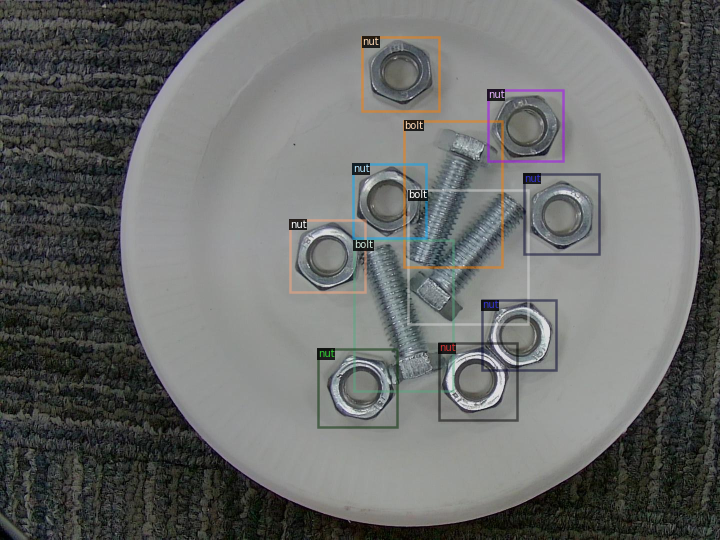

In [8]:
for image in random.sample(test_dataset_dicts, 1):
    img = cv2.imread(image["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=coco_lslm_test_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(image)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [9]:
from detectron2.engine import DefaultPredictor, default_setup
from detectron2.config import get_cfg
from detectron2 import model_zoo

In [10]:
def setup_cfg(args):
    """设置基本参数"""
    cfg = get_cfg()
    
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    # cfg.DATASETS.TRAIN = ("lslm_coco_train", )
    cfg.DATASETS.TEST = ("lslm_coco_test", )
    # cfg.DATASETS.TEST = ("lslm_coco_train", )
    cfg.DATALOADER.NUM_WORKERS = 2
    
    # Let training initialize from model zoo
    # cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  
    cfg.MODEL.WEIGHTS = args.model_weights
    
    cfg.SOLVER.IMS_PER_BATCH = 2
    # pick a good LR
    cfg.SOLVER.BASE_LR = 0.00025 
    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
    cfg.SOLVER.MAX_ITER = 300 
    # faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   
    # coco datasets(bolt, nut)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
    cfg.MODEL.RPN.NMS_THRESH=0.5
    
    cfg.freeze()
    default_setup(cfg, args)
    
    return cfg

In [11]:
import argparse 

In [12]:
parser = argparse.ArgumentParser(description="LSLM test for builtin models")
parser.add_argument(
    "--config-file",
    default="/home/workspace/bolt_nut/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml",
    metavar="FILE",
    help="path to config file",
    )
parser.add_argument(
    "--model-weights", 
    default="/home/workspace/bolt_nut/models/model_final.pth", 
    type=str, 
    help="Initial weights path.", 
    )
parser.add_argument(
    "--opts",
    help="Modify config options using the command-line 'KEY VALUE' pairs",
    default=[],
    nargs=argparse.REMAINDER,
    )

_StoreAction(option_strings=['--opts'], dest='opts', nargs='...', const=None, default=[], type=None, choices=None, help="Modify config options using the command-line 'KEY VALUE' pairs", metavar=None)

In [13]:
args = parser.parse_args(args=[])
print(args.model_weights)

/home/workspace/bolt_nut/models/model_final.pth


In [14]:
cfg = setup_cfg(args)
cfg

[03/30 13:13:13 detectron2]: Rank of current process: 0. World size: 1
[03/30 13:13:13 detectron2]: Rank of current process: 0. World size: 1
[03/30 13:13:15 detectron2]: Environment info:
------------------------  --------------------------------------------------------------
sys.platform              linux
Python                    3.7.4 (default, Aug 13 2019, 20:35:49) [GCC 7.3.0]
numpy                     1.17.2
detectron2                0.1.1 @/root/anaconda3/lib/python3.7/site-packages/detectron2
detectron2 compiler       GCC 7.4
detectron2 CUDA compiler  10.1
detectron2 arch flags     sm_70
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.4.0 @/root/anaconda3/lib/python3.7/site-packages/torch
PyTorch debug build       False
CUDA available            True
GPU 0,1,2,3,4,5,6,7       Tesla V100-PCIE-32GB
CUDA_HOME                 /usr/local/cuda
NVCC                      Cuda compilation tools, release 10.1, V10.1.243
Pillow                    6.2.0
torchvision       

[03/30 13:13:15 detectron2]: Running with full config:
CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 2
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('lslm_coco_test',)
  TRAIN: ('coco_2017_train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32], [64], [128], [256], [512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: 

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': '/home/workspace/bolt_nut/models/model_final.pth', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res2', 'res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32], [64], [128], [256], [512]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHead', 'IN_FEATURES': ['p2', 'p3', 'p4', 'p5', 'p6'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZE_PER_IMAGE': 256, 'POSITIVE_FRACTION': 0.5, 'BBOX_REG_WEIGHTS': (1.0, 1.0

# 预测器

In [15]:
predictor = DefaultPredictor(cfg)

[03/30 13:13:22 fvcore.common.checkpoint]: Loading checkpoint from /home/workspace/bolt_nut/models/model_final.pth


In [16]:
from detectron2.utils.visualizer import ColorMode

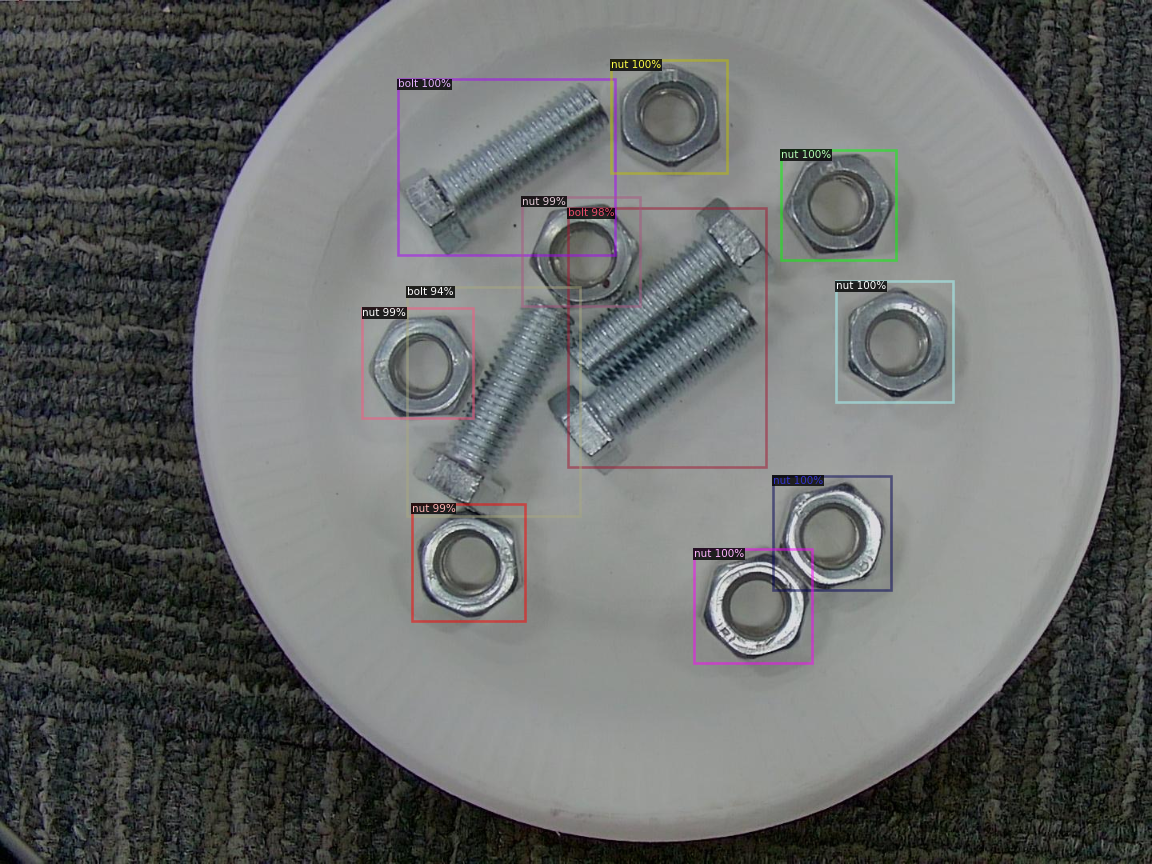

In [17]:
for d in random.sample(test_dataset_dicts, 1):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=coco_lslm_test_metadata, 
                   scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [18]:
outputs

{'instances': Instances(num_instances=11, image_height=1080, image_width=1440, fields=[pred_boxes: Boxes(tensor([[ 867.2932,  686.4431, 1015.2668,  828.8953],
         [ 966.2088,  595.0877, 1114.0723,  737.9186],
         [ 975.9253,  188.3449, 1119.4578,  326.2521],
         [ 763.8914,   75.6903,  909.2968,  217.0674],
         [ 497.3224,  100.1724,  768.5142,  319.9636],
         [1044.7340,  352.4409, 1191.4794,  502.4655],
         [ 514.3944,  630.0513,  656.4862,  777.1224],
         [ 453.0871,  385.7448,  590.6519,  523.5362],
         [ 652.7551,  246.7224,  799.9548,  382.7228],
         [ 709.3823,  261.1176,  957.4955,  584.2032],
         [ 508.9691,  359.6657,  725.5454,  644.8658]], device='cuda:0')), scores: tensor([0.9984, 0.9983, 0.9978, 0.9973, 0.9969, 0.9968, 0.9950, 0.9942, 0.9906,
         0.9838, 0.9363], device='cuda:0'), pred_classes: tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], device='cuda:0')])}

In [19]:
outputs.get('instances').pred_boxes.to('cpu').tensor.numpy()

array([[ 867.29315,  686.44305, 1015.26685,  828.89526],
       [ 966.2088 ,  595.0877 , 1114.0723 ,  737.91864],
       [ 975.9253 ,  188.34491, 1119.4578 ,  326.2521 ],
       [ 763.8914 ,   75.69032,  909.2968 ,  217.06744],
       [ 497.32242,  100.17242,  768.51416,  319.9636 ],
       [1044.734  ,  352.44086, 1191.4794 ,  502.46545],
       [ 514.3944 ,  630.0513 ,  656.4862 ,  777.12244],
       [ 453.0871 ,  385.74478,  590.6519 ,  523.5362 ],
       [ 652.7551 ,  246.72235,  799.95483,  382.7228 ],
       [ 709.38226,  261.1176 ,  957.4955 ,  584.2032 ],
       [ 508.96906,  359.66568,  725.5454 ,  644.8658 ]], dtype=float32)

In [20]:
outputs.get('instances').pred_classes.to('cpu').numpy()

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

# 使用Detectorn2 API函数进行Evaluation，计算各个参数

In [21]:
# 导入基本detectorn2 API函数进行模型评测
from detectron2.modeling import build_model
from detectron2.data import build_detection_test_loader 
from detectron2.evaluation import COCOEvaluator
from detectron2.evaluation import inference_on_dataset
import os 

In [22]:
def lslm_evaluation(cfg, output_dir=None):
    # 创建模型
    model = build_model(cfg)
    # 创建数据器
    lslm_evaluation_data_loader = build_detection_test_loader(cfg, cfg.DATASETS.TEST[0])
    # 创建评估器
    if output_dir is None:
        print(cfg.OUTPUT_DIR)
        output_dir = os.path.join(cfg.OUTPUT_DIR, "inference")
    lslm_coco_evaluator = COCOEvaluator(cfg.DATASETS.TEST[0], cfg, True, output_dir=output_dir)
    # 进行数据评估
    evaluation_result = inference_on_dataset(model, lslm_evaluation_data_loader, lslm_coco_evaluator)
    
    return evaluation_result 

In [23]:
evl_res = lslm_evaluation(cfg)
evl_res

[03/30 13:13:52 d2.data.datasets.coco]: Loaded 10 images in COCO format from /home/workspace/bolt_nut/datasets/annotations/lslm_test.json
[03/30 13:13:52 d2.data.datasets.coco]: Loaded 10 images in COCO format from /home/workspace/bolt_nut/datasets/annotations/lslm_test.json
[03/30 13:13:52 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    bolt    | 38           |    nut     | 69           |
|            |              |            |              |
|   total    | 107          |            |              |
[03/30 13:13:52 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    bolt    | 38           |    nut     | 69           |
|            |              |            |              |
|   total    | 107          |         

OrderedDict([('bbox',
              {'AP': 0.0,
               'AP-bolt': 0.0,
               'AP-nut': 0.0,
               'AP50': 0.0,
               'AP75': 0.0,
               'APl': 0.0,
               'APm': nan,
               'APs': nan})])

# 目标检测评价指标mAP的计算

1.组织ground truth box 信息，存储格式{'1':{'file_name':'', 'bboxs':[], 'categorys':[]}, '2':{}}

In [24]:
import json

In [25]:
def get_image_id_file_name(images_info):
    images = {} 
    for single_image in images_info:
        # id 是每个文件的唯一标识
        images[str(single_image.get('id'))] = single_image.get('file_name')
    
    return images 

In [26]:
def get_category_id(categories_info):
    categories = {} 
    for single in categories_info:
        categories[single.get('name')] = single.get('id')
    
    return categories

In [27]:
def get_ground_truth(test_label_path="../../datasets/annotations/lslm_test.json"):
    with open(test_label_path, mode='r', encoding='utf-8') as fp:
        bbox_dict = json.load(fp)
        
        ground_truth_dict = {}
        # 获取每个image_id对应的image file name 
        images = get_image_id_file_name(bbox_dict.get('images'))
        # 获取每个类别对应的id
        categories = get_category_id(bbox_dict.get('categories'))
        annotations = bbox_dict.get('annotations')
        for single_annotation in annotations:
            if single_annotation.get('image_id') not in ground_truth_dict.keys():
                temp_dict = {'file_name': images.get(str(single_annotation.get('image_id'))), 
                             'bboxes': [], 'categories': []}
                
                object_box = single_annotation.get('bbox')
                # 由[x, y, w, h] to [x_left, y_top, x_right, y_bot]
                temp_dict.get('bboxes').append([object_box[0], object_box[1], 
                                               object_box[0]+object_box[2], object_box[1]+object_box[3]])
                temp_dict.get('categories').append(single_annotation.get('category_id'))
                ground_truth_dict[single_annotation.get('image_id')] = temp_dict
            else:
                object_box = single_annotation.get('bbox')
                # 由[x, y, w, h] to [x_left, y_top, x_right, y_bot]
                ground_truth_dict.get(single_annotation.get('image_id')).get('bboxes').append([object_box[0], object_box[1], 
                                               object_box[0]+object_box[2], object_box[1]+object_box[3]])
                ground_truth_dict.get(single_annotation.get('image_id')).get('categories').append(single_annotation.get('category_id'))
    
    return ground_truth_dict, categories

In [28]:
ground_truth_dict, categories = get_ground_truth()
ground_truth_dict, categories

({'1': {'bboxes': [[761.043, 223.652, 986.434, 493.565],
    [822.261, 318.261, 1017.044, 610.435],
    [758.261, 123.478, 902.957, 273.739],
    [446.609, 257.043, 602.435, 404.521],
    [582.957, 201.391, 724.87, 343.304],
    [666.435, 296, 805.565, 443.478],
    [596.87, 446.261, 755.479, 599.304],
    [674.783, 707.826, 819.479, 860.869],
    [861.217, 688.348, 1003.13, 846.957],
    [966.957, 602.087, 1100.522, 755.13]],
   'categories': [1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
   'file_name': '1.jpg'},
  '10': {'bboxes': [[446.676, 250.167, 736.067, 372.602],
    [638.676, 325.297, 922.502, 453.297],
    [950.329, 361.471, 1209.112, 609.123],
    [432.763, 436.602, 722.154, 586.863],
    [708.242, 461.645, 869.633, 776.08],
    [813.981, 155.558, 955.894, 297.471],
    [947.546, 177.819, 1092.242, 308.602],
    [900.242, 347.558, 1042.155, 497.819],
    [599.72, 520.08, 749.981, 670.341],
    [986.502, 567.384, 1136.763, 709.297],
    [802.85, 695.384, 961.459, 848.427]],
   'categories'

In [29]:
ground_truth_dict.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

获取预测的bbox，存储格式{'1':{'file_name':'', 'bboxs':[], 'categorys':[]}, '2':{}}

In [33]:
test_dataset_dicts[0]

{'annotations': [{'bbox': [761.043, 223.652, 225.39099999999996, 269.913],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [822.261, 318.261, 194.78300000000002, 292.1739999999999],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [758.261, 123.478, 144.69600000000003, 150.26099999999997],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 1,
   'iscrowd': 0},
  {'bbox': [446.609, 257.043, 155.82599999999996, 147.478],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 1,
   'iscrowd': 0},
  {'bbox': [582.957, 201.391, 141.913, 141.91299999999998],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 1,
   'iscrowd': 0},
  {'bbox': [666.435, 296, 139.1300000000001, 147.478],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 1,
   'iscrowd': 0},
  {'bbox': [596.87, 446.261, 158.60900000000004, 153.04299999999995],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 1,
   'iscrowd

In [34]:
predict_bbox_dict = {}
for single_image_info in test_dataset_dicts:
    # 只截取图片name，不需要绝对路径
    temp_bbox_dict = {'file_name': single_image_info.get('file_name').split('/')[-1]}
    image_data = cv2.imread(single_image_info.get('file_name'))
    outputs = predictor(image_data).get('instances').to('cpu')
    
    temp_bbox_dict['bboxes'] = outputs.pred_boxes.tensor.numpy()
    temp_bbox_dict['categories'] = outputs.pred_classes.numpy()
    temp_bbox_dict['scores'] = outputs.scores.numpy()
    
    predict_bbox_dict[single_image_info.get('image_id')] = temp_bbox_dict

In [35]:
predict_bbox_dict, type(predict_bbox_dict['5']['bboxes'])

({'1': {'bboxes': array([[ 601.9852 ,  453.9013 ,  744.0974 ,  594.94366],
          [ 571.80316,  206.59032,  725.8329 ,  344.5811 ],
          [ 858.8431 ,  695.88135,  998.3287 ,  838.86896],
          [ 449.1303 ,  257.69553,  591.6038 ,  403.62274],
          [ 958.8335 ,  609.7087 , 1103.5555 ,  750.8499 ],
          [ 676.25745,  708.49176,  824.5159 ,  857.3131 ],
          [ 755.614  ,  135.49698,  906.6995 ,  272.16644],
          [ 658.1486 ,  309.1979 ,  813.30023,  435.94772],
          [ 757.2676 ,  216.13875, 1025.2828 ,  576.64966],
          [ 835.5504 ,  318.4151 , 1025.4208 ,  611.4742 ]], dtype=float32),
   'categories': array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0]),
   'file_name': '1.jpg',
   'scores': array([0.9980191 , 0.9976604 , 0.99749005, 0.9973763 , 0.9968989 ,
          0.99620616, 0.99619746, 0.99406105, 0.96634924, 0.9180139 ],
         dtype=float32)},
  '10': {'bboxes': array([[ 953.64056,  183.34639, 1091.8778 ,  320.83295],
          [ 813.8156 ,  158.96971,

筛选各个类别的目标框（包括GT，Predict），以及预测置信度分

In [36]:
import numpy as np 

In [37]:
def get_single_category_object_indexes(categories, category_id):
    if isinstance(categories, list):
        categories = np.array(categories)
        return np.where(categories==category_id)
    elif isinstance(categories, np.ndarray):
        return np.where(categories==category_id)

In [38]:
def get_single_object_info(image_info, category_id, predict=False):
    single_object_info = {}
    for key in image_info.keys():
        temp_single_image_single_object_info = {'bboxes':[], 'categories':[], 'scores':[]}
        if predict:
            # 预测类别索引从0开始，GT是从1开始的
            categories = image_info.get(key).get('categories')+1
        else:
            categories = image_info.get(key).get('categories')
        indexes = list(get_single_category_object_indexes(categories, category_id))
        bboxes = image_info.get(key).get('bboxes')
        if isinstance(bboxes, list):
            bboxes = np.array(bboxes)
        if isinstance(categories, list):
            categories = np.array(categories)
        
        temp_single_image_single_object_info.get('bboxes').extend(bboxes[indexes].tolist())
        temp_single_image_single_object_info.get('categories').extend(categories[indexes].tolist())
        if predict:
            scores = image_info.get(key).get('scores')
            if isinstance(scores, list):
                scores = np.array(scores)
            temp_single_image_single_object_info.get('scores').extend(scores[indexes].tolist())
            
        single_object_info[key] = temp_single_image_single_object_info
    
    return single_object_info

In [46]:
single_gt_object_info = get_single_object_info(ground_truth_dict, 1)
single_gt_object_info

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


{'1': {'bboxes': [[761.043, 223.652, 986.434, 493.565],
   [822.261, 318.261, 1017.044, 610.435]],
  'categories': [1, 1],
  'scores': []},
 '10': {'bboxes': [[446.676, 250.167, 736.067, 372.602],
   [638.676, 325.297, 922.502, 453.297],
   [950.329, 361.471, 1209.112, 609.123],
   [432.763, 436.602, 722.154, 586.863],
   [708.242, 461.645, 869.633, 776.08]],
  'categories': [1, 1, 1, 1, 1],
  'scores': []},
 '2': {'bboxes': [[811.198, 242.115, 1005.981, 523.158],
   [830.676, 328.376, 1025.459, 612.202]],
  'categories': [1, 1],
  'scores': []},
 '3': {'bboxes': [[591.304, 142.957, 722.087, 437.914],
   [816.696, 243.13, 1014.261, 532.521],
   [836.174, 334.957, 1030.957, 616.0],
   [730.435, 471.304, 908.522, 769.043]],
  'categories': [1, 1, 1, 1],
  'scores': []},
 '4': {'bboxes': [[808.415, 242.115, 1003.198, 534.289],
   [816.763, 381.246, 1056.067, 648.376],
   [708.242, 481.42, 905.807, 781.942]],
  'categories': [1, 1, 1],
  'scores': []},
 '5': {'bboxes': [[491.198, 100.202, 

In [48]:
single_predict_object_info = get_single_object_info(predict_bbox_dict, 1, predict=True)
single_predict_object_info

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an err

{'1': {'bboxes': [[757.267578125,
    216.1387481689453,
    1025.2828369140625,
    576.649658203125],
   [835.5504150390625,
    318.41510009765625,
    1025.4207763671875,
    611.4741821289062]],
  'categories': [1, 1],
  'scores': [0.9663492441177368, 0.918013870716095]},
 '10': {'bboxes': [[960.723388671875,
    369.5339050292969,
    1205.73046875,
    600.7891235351562],
   [705.6107177734375,
    476.65704345703125,
    867.1472778320312,
    757.6469116210938],
   [421.5553894042969,
    432.0849914550781,
    704.1078491210938,
    587.3488159179688],
   [445.2357177734375,
    259.60955810546875,
    752.2872314453125,
    376.8116149902344],
   [647.0595703125, 330.7666015625, 927.3549194335938, 453.53253173828125]],
  'categories': [1, 1, 1, 1, 1],
  'scores': [0.965870201587677,
   0.9597368836402893,
   0.9555972218513489,
   0.9432770609855652,
   0.8670508861541748]},
 '2': {'bboxes': [[811.129150390625,
    233.8432159423828,
    1032.450927734375,
    591.5705566406

计算predict box与GT box的overlap

In [53]:
def compute_iou_overlap(predict_box, gt_boxes):
    """
    predict_box: np.ndarray, 1d
    gt_boxes: np.ndarray, 2d 
    """
    if gt_boxes.size:
        # print(gt_boxes.shape[0])
        # compute overlaps
        # intersection
        ixmin = np.maximum(gt_boxes[:, 0], predict_box[0])
        iymin = np.maximum(gt_boxes[:, 1], predict_box[1])
        ixmax = np.minimum(gt_boxes[:, 2], predict_box[2])
        iymax = np.minimum(gt_boxes[:, 3], predict_box[3])
        iw = np.maximum(ixmax - ixmin + 1., 0.)
        ih = np.maximum(iymax - iymin + 1., 0.)
        inters = iw * ih

        # union
        uni = ((predict_box[2] - predict_box[0] + 1.) * 
               (predict_box[3] - predict_box[1] + 1.) +
               (gt_boxes[:, 2] - gt_boxes[:, 0] + 1.) *
               (gt_boxes[:, 3] - gt_boxes[:, 1] + 1.) - inters)

        overlaps = inters / uni
    
    return overlaps 

In [60]:
single_gt_object_1_info = get_single_object_info(ground_truth_dict, 1)
single_predict_object_1_info = get_single_object_info(predict_bbox_dict, 1, predict=True)
overlaps_image_1 = compute_iou_overlap(np.array(single_predict_object_1_info.get('1').get('bboxes')[1]), 
                                      np.array(single_gt_object_1_info.get('1').get('bboxes'))) 
overlaps_image_1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an err

array([0.29495876, 0.89047475])

In [61]:
ovmax = np.max(overlaps_image_1)
jmax = np.argmax(overlaps_image_1)
ovmax, jmax

(0.8904747454652345, 1)

对每个image每个类每个框分别计算IOU，获取每个预测框的是否预测正确，即与GT框的IOU是否大于阈值

In [56]:
import copy

In [57]:
def compute_tp_fp(predict_object_boxes, gt_object_boxes, threshold_IOU=0.5):
    """
    # 计算每张图片的tp-True positives, fp-False positives, 并存储在predict_object_boxes预测信息中添加字段
    predict_object_boxes: 预测框的信息
    gt_object_boxes: 真实框的信息
    """
    output_predict_object_boxes = copy.deepcopy(predict_object_boxes)
    
    for image_id in predict_object_boxes.keys():
        single_image_predict_boxes = np.array(predict_object_boxes.get(image_id).get('bboxes'))
        single_image_gt_boxes = np.array(gt_object_boxes.get(image_id).get('bboxes'))
        tp = np.zeros(single_image_predict_boxes.shape[0])
        fp = np.zeros(single_image_predict_boxes.shape[0])
        # 记录预测框是否重复与GT框计算IOU
        duplicate_record = np.array([False]*single_image_gt_boxes.shape[0])
        for index, single_predict_box in enumerate(single_image_predict_boxes):
            overlaps = compute_iou_overlap(single_predict_box, single_image_gt_boxes)
            ovmax = np.max(overlaps)
            index_max = np.argmax(overlaps)
            if ovmax > threshold_IOU:
                # 记录某个GT框是否从来没有被匹配过
                if not duplicate_record[index_max]:
                    duplicate_record[index_max] = True 
                    tp[index] = 1.0
                else:
                    fp[index] = 1.0 
            else:
                fp[index] = 1.0
        
        # 将tp, fp数据存储
        output_predict_object_boxes.get(image_id)['tp'] = tp.tolist()
        output_predict_object_boxes.get(image_id)['fp'] = fp.tolist()
        
    return output_predict_object_boxes

In [58]:
gt_object_1_info = get_single_object_info(ground_truth_dict, 1)
predict_object_1_info = get_single_object_info(predict_bbox_dict, 1, predict=True)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an err

In [59]:
output_predict_object_boxes = compute_tp_fp(predict_object_1_info, gt_object_1_info, threshold_IOU=0.75)
output_predict_object_boxes

{'1': {'bboxes': [[757.267578125,
    216.1387481689453,
    1025.2828369140625,
    576.649658203125],
   [835.5504150390625,
    318.41510009765625,
    1025.4207763671875,
    611.4741821289062]],
  'categories': [1, 1],
  'fp': [1.0, 0.0],
  'scores': [0.9663492441177368, 0.918013870716095],
  'tp': [0.0, 1.0]},
 '10': {'bboxes': [[960.723388671875,
    369.5339050292969,
    1205.73046875,
    600.7891235351562],
   [705.6107177734375,
    476.65704345703125,
    867.1472778320312,
    757.6469116210938],
   [421.5553894042969,
    432.0849914550781,
    704.1078491210938,
    587.3488159179688],
   [445.2357177734375,
    259.60955810546875,
    752.2872314453125,
    376.8116149902344],
   [647.0595703125, 330.7666015625, 927.3549194335938, 453.53253173828125]],
  'categories': [1, 1, 1, 1, 1],
  'fp': [0.0, 0.0, 0.0, 0.0, 0.0],
  'scores': [0.965870201587677,
   0.9597368836402893,
   0.9555972218513489,
   0.9432770609855652,
   0.8670508861541748],
  'tp': [1.0, 1.0, 1.0, 1.0

计算评价数据集的boxes的数目

In [64]:
def compute_evaluation_datasets_object(boxes_info):
    """
    boxes_info: gt 信息，predict 信息
    可以计算gt object boxes number or predict object boxes number
    """
    box_nums = 0
    for image_id in boxes_info.keys():
        box_nums += len(boxes_info.get(image_id).get('bboxes'))
        
    return box_nums

In [65]:
gt_box_nums = compute_evaluation_datasets_object(gt_object_1_info)
gt_object_1_info, gt_box_nums

({'1': {'bboxes': [[761.043, 223.652, 986.434, 493.565],
    [822.261, 318.261, 1017.044, 610.435]],
   'categories': [1, 1],
   'scores': []},
  '10': {'bboxes': [[446.676, 250.167, 736.067, 372.602],
    [638.676, 325.297, 922.502, 453.297],
    [950.329, 361.471, 1209.112, 609.123],
    [432.763, 436.602, 722.154, 586.863],
    [708.242, 461.645, 869.633, 776.08]],
   'categories': [1, 1, 1, 1, 1],
   'scores': []},
  '2': {'bboxes': [[811.198, 242.115, 1005.981, 523.158],
    [830.676, 328.376, 1025.459, 612.202]],
   'categories': [1, 1],
   'scores': []},
  '3': {'bboxes': [[591.304, 142.957, 722.087, 437.914],
    [816.696, 243.13, 1014.261, 532.521],
    [836.174, 334.957, 1030.957, 616.0],
    [730.435, 471.304, 908.522, 769.043]],
   'categories': [1, 1, 1, 1],
   'scores': []},
  '4': {'bboxes': [[808.415, 242.115, 1003.198, 534.289],
    [816.763, 381.246, 1056.067, 648.376],
    [708.242, 481.42, 905.807, 781.942]],
   'categories': [1, 1, 1],
   'scores': []},
  '5': {'bb

将各个图片预测boxes的各种信息整合到一个列表中

In [71]:
def combine_each_image_predict_box_each_info(predict_boxes_each_info):
    """
    # 将预测信息各个字段列表都整合为一个列表
    """
    combine_predict_info = {'bboxes': [], 'categories': [], 'scores': [], 'tp': [], 'fp': []}
    for image_id in predict_boxes_each_info.keys():
        combine_predict_info.get('bboxes').extend(predict_boxes_each_info.get(image_id).get('bboxes'))
        combine_predict_info.get('categories').extend(predict_boxes_each_info.get(image_id).get('categories'))
        combine_predict_info.get('scores').extend(predict_boxes_each_info.get(image_id).get('scores'))
        combine_predict_info.get('tp').extend(predict_boxes_each_info.get(image_id).get('tp'))
        combine_predict_info.get('fp').extend(predict_boxes_each_info.get(image_id).get('fp'))
    
    out_scores_sort_combine_predict_info = {}
    # 按score降序排列
    desc_sort_index = np.argsort(-np.array(combine_predict_info.get('scores')))
    out_scores_sort_combine_predict_info['bboxes'] = np.array(combine_predict_info.get('bboxes'))[desc_sort_index]
    out_scores_sort_combine_predict_info['scores'] = np.array(combine_predict_info.get('scores'))[desc_sort_index]
    out_scores_sort_combine_predict_info['tp'] = np.array(combine_predict_info.get('tp'))[desc_sort_index]
    out_scores_sort_combine_predict_info['fp'] = np.array(combine_predict_info.get('fp'))[desc_sort_index]
    
    return out_scores_sort_combine_predict_info, combine_predict_info

In [72]:
sort_predict_info, unsort_predict_info = combine_each_image_predict_box_each_info(output_predict_object_boxes)
sort_predict_info, unsort_predict_info

({'bboxes': array([[ 621.58984375,  498.63778687,  897.6427002 ,  726.54876709],
         [ 497.32241821,  100.17241669,  768.51416016,  319.96359253],
         [ 437.4536438 ,  127.75296783,  702.96917725,  379.15869141],
         [ 624.90313721,  505.30944824,  885.83184814,  737.71411133],
         [ 453.35189819,  117.35527802,  692.55072021,  381.68927002],
         [ 478.99575806,  108.52424622,  683.17730713,  391.97753906],
         [ 709.38226318,  261.11761475,  957.4954834 ,  584.20318604],
         [ 811.12915039,  233.84321594, 1032.45092773,  591.57055664],
         [ 884.73199463,  429.65942383, 1183.82995605,  554.6895752 ],
         [ 883.5123291 ,  423.82839966, 1186.3302002 ,  546.20550537],
         [ 823.87487793,  240.87831116, 1035.87695312,  595.02294922],
         [ 619.73309326,  478.40930176,  876.67901611,  738.64605713],
         [ 757.26757812,  216.13874817, 1025.28283691,  576.6496582 ],
         [ 960.72338867,  369.53390503, 1205.73046875,  600.7891235

计算precision和recall

In [73]:
def compute_precision_recall(sort_predict_info, gt_box_nums):
    """
    sort_predict_info: 所有按照scores分排序的预测框的信息
    gt_box_nums：所有GT box 的数目
    """
    # 对列表的信息依次相加即np.array([1, 2, 3]), np.cumsum(np.array([1, 2, 3])) = np.array([1, 3, 6])
    tp = np.cumsum(sort_predict_info.get('tp'))
    fp = np.cumsum(sort_predict_info.get('fp'))
    
    precision = tp / np.maximum(tp + fp, np.finfo(np.float64).eps)
    recall = tp / float(gt_box_nums)
    
    return precision, recall

In [74]:
precision, recall = compute_precision_recall(sort_predict_info, gt_box_nums)
precision, recall

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.85714286, 0.75      , 0.77777778, 0.8       ,
        0.72727273, 0.75      , 0.69230769, 0.71428571, 0.73333333,
        0.75      , 0.76470588, 0.77777778, 0.78947368, 0.8       ,
        0.80952381, 0.77272727, 0.7826087 , 0.79166667, 0.8       ,
        0.80769231, 0.81481481, 0.82142857, 0.82758621, 0.83333333,
        0.83870968, 0.84375   , 0.84848485, 0.85294118, 0.85714286,
        0.83333333]),
 array([0.02631579, 0.05263158, 0.07894737, 0.10526316, 0.13157895,
        0.15789474, 0.15789474, 0.15789474, 0.18421053, 0.21052632,
        0.21052632, 0.23684211, 0.23684211, 0.26315789, 0.28947368,
        0.31578947, 0.34210526, 0.36842105, 0.39473684, 0.42105263,
        0.44736842, 0.44736842, 0.47368421, 0.5       , 0.52631579,
        0.55263158, 0.57894737, 0.60526316, 0.63157895, 0.65789474,
        0.68421053, 0.71052632, 0.73684211, 0.76315789, 0.78947368,
        0.78947368]))

In [75]:
def compute_ap(rec, prec, use_07_metric=False):
    """Compute VOC AP given precision and recall. If use_07_metric is true, uses
    the VOC 07 11-point method (default:False).
    """
    if use_07_metric:
        # 11 point metric
        ap = 0.
        for t in np.arange(0., 1.1, 0.1):
            if np.sum(rec >= t) == 0:
                # rec是否有大于t的值
                p = 0
            else:
                # 在大于t的rec对应的prec中选取最大的
                p = np.max(prec[rec >= t])
            ap = ap + p / 11.
    else:
        # correct AP calculation
        # first append sentinel values at the end
        mrec = np.concatenate(([0.], rec, [1.]))
        # 设置首末两个标志位
        mpre = np.concatenate(([0.], prec, [0.]))

        # compute the precision envelope
        for i in range(mpre.size - 1, 1, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

        # to calculate area under PR curve, 
        # look for points where X axis (recall) changes value
        # 寻找mrec的变化点，其实就是对比前一个数与后一个是否相等
        # np.where返回的是一个多元组，主要看mrec的维度，mrec的维度为2，返回的维度就是2维
        # 具体参见np.where的接口说明
        i = np.where(mrec[1:] != mrec[:-1])[0]

        # and sum (\Delta recall) * prec, 积分公式求面积，即求和
        ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

In [76]:
ap_1 = compute_ap(recall, precision)
ap_1

0.6992481203007517